# Weather Forcast 

In [1]:
%pip install seaborn
%pip install matplotlib

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Get the data from the API
api_key = "b96552c1b2f7c39bb4318420ca8d2227" 

In [3]:
cities = ["New York", "Grand Rapids", "Chicago", "Menlo Park", "Seattle"]

In [4]:
def fetch_weather_data(city):
    url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()
    return data
weather_data = {city: fetch_weather_data(city) for city in cities}

In [5]:
def process_weather_data(data):
    timestamps = [entry['dt'] for entry in data['list']]
    temperatures = [entry['main']['temp'] for entry in data['list']]
    pressures = [entry['main']['pressure'] for entry in data['list']]
    humidities = [entry['main']['humidity'] for entry in data['list']]
    
    df = pd.DataFrame({'Timestamp': timestamps, 
                       'Temperature (C)': temperatures,
                       'Pressure (hPa)': pressures,
                       'Humidity (%)': humidities})
    
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
    df.set_index('Timestamp', inplace=True)
    return df

processed_data = {city: process_weather_data(weather_data[city]) for city in cities}
print("New York:", processed_data['New York'].head())
print("Grand Rapids: ", processed_data['Grand Rapids'].head())
print("Chicago:", processed_data['Chicago'].head())
print("Menlo Park:", processed_data['Menlo Park'].head())
print("Seattle:", processed_data['Seattle'].head())

New York:                      Temperature (C)  Pressure (hPa)  Humidity (%)
Timestamp                                                         
2024-05-12 18:00:00            10.13            1014            83
2024-05-12 21:00:00            10.66            1014            77
2024-05-13 00:00:00            10.73            1015            71
2024-05-13 03:00:00            10.32            1016            73
2024-05-13 06:00:00             9.96            1017            77
Grand Rapids:                       Temperature (C)  Pressure (hPa)  Humidity (%)
Timestamp                                                         
2024-05-12 18:00:00            19.66            1011            54
2024-05-12 21:00:00            20.36            1010            56
2024-05-13 00:00:00            19.25            1008            66
2024-05-13 03:00:00            14.48            1007            93
2024-05-13 06:00:00            14.25            1007            95
Chicago:                      Tempera

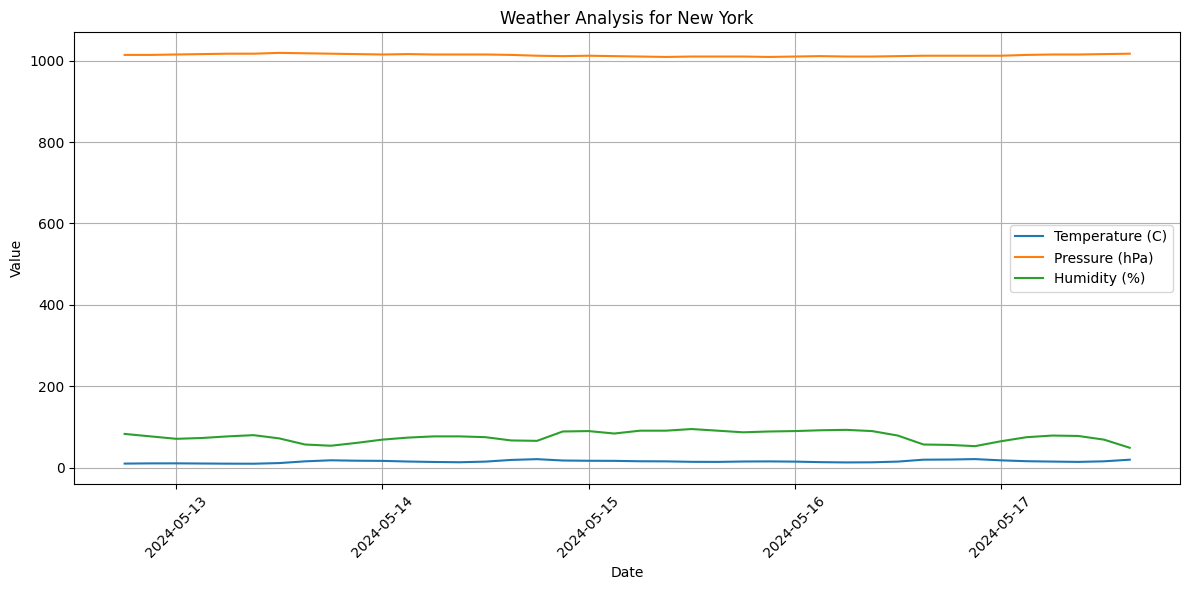

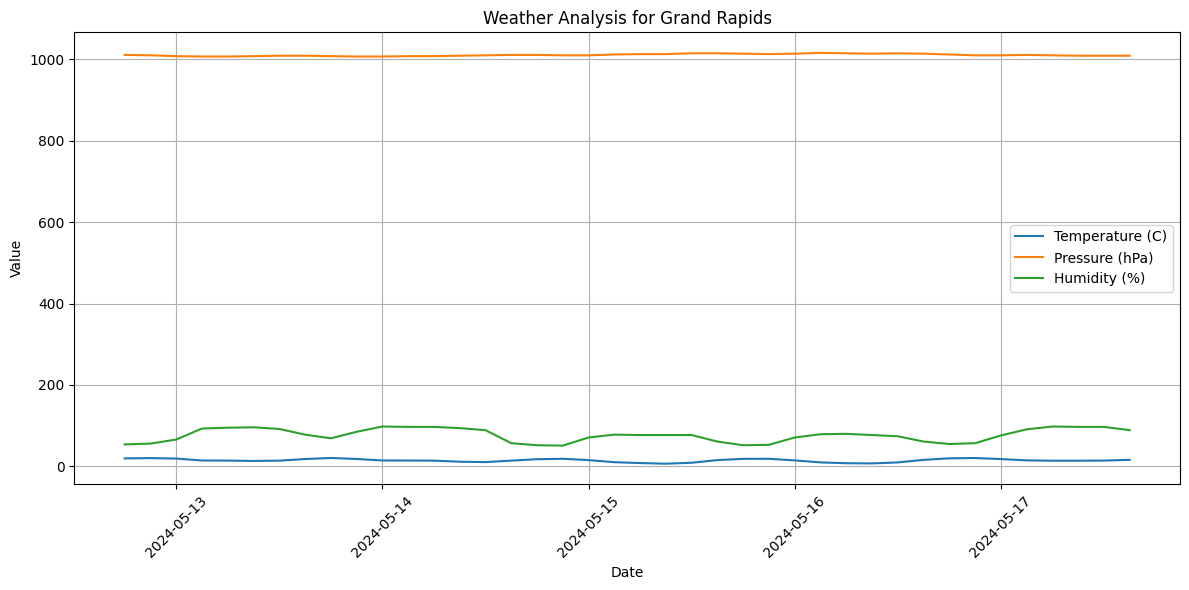

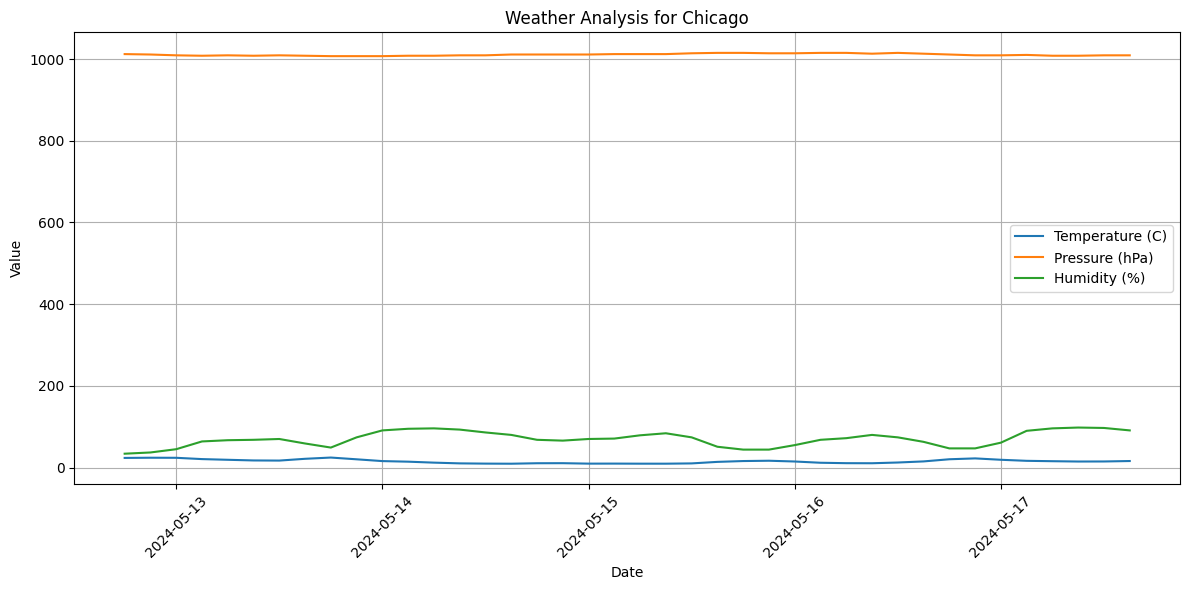

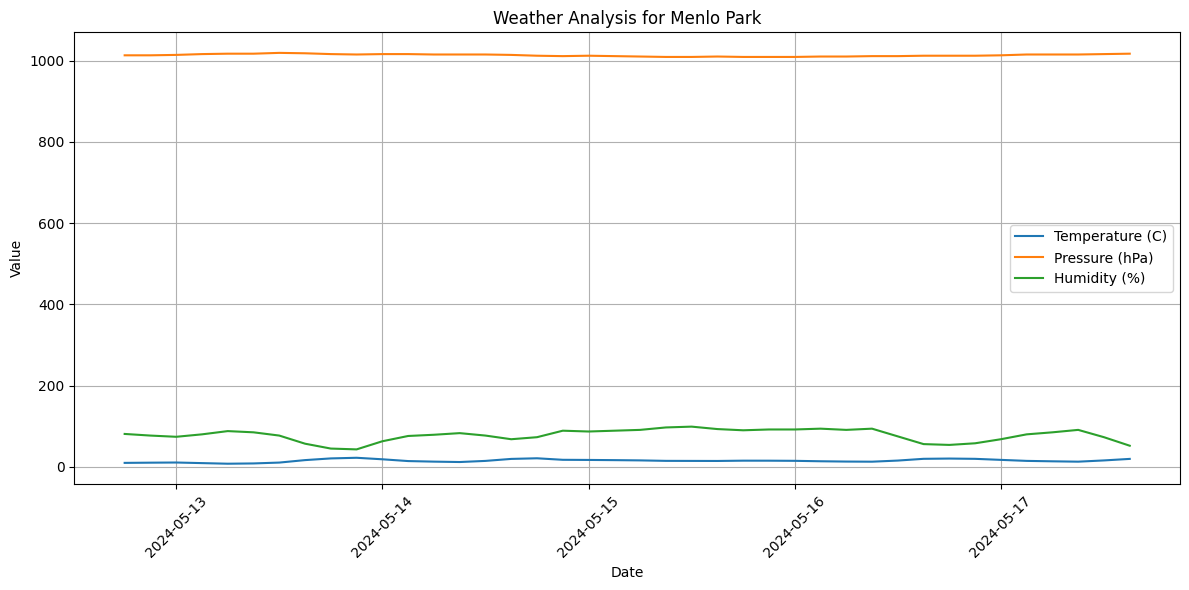

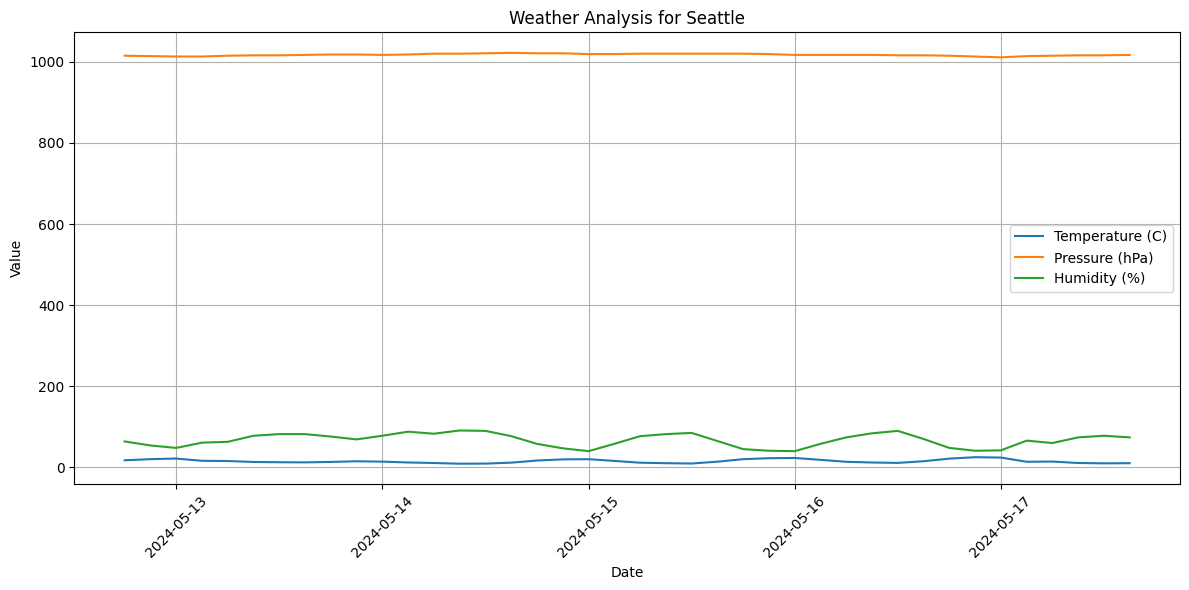

In [6]:
def plot_weather_data(city, data):
    if data is not None:
        plt.figure(figsize=(12, 6))
        plt.plot(data.index, data['Temperature (C)'], label='Temperature (C)')
        plt.plot(data.index, data['Pressure (hPa)'], label='Pressure (hPa)')
        plt.plot(data.index, data['Humidity (%)'], label='Humidity (%)')
        plt.title(f"Weather Analysis for {city}")
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

for city in cities:
    plot_weather_data(city, processed_data[city])


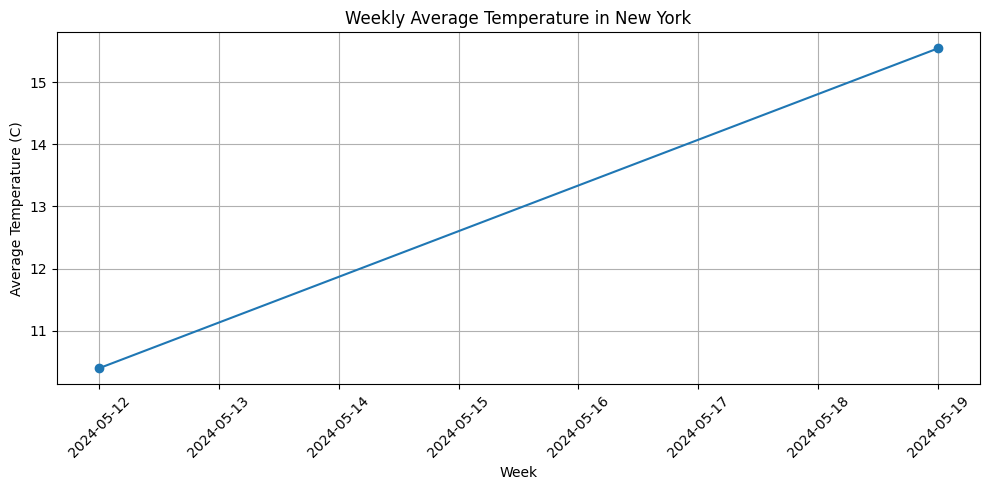

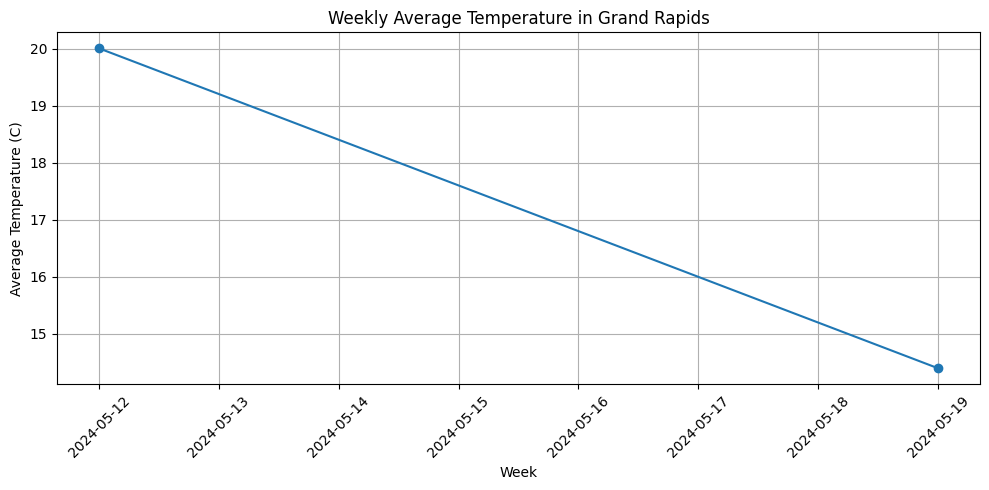

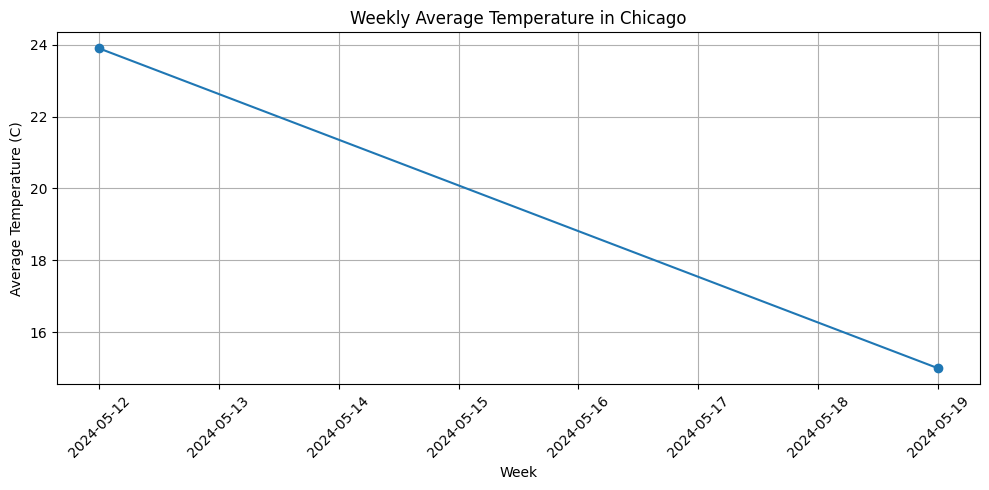

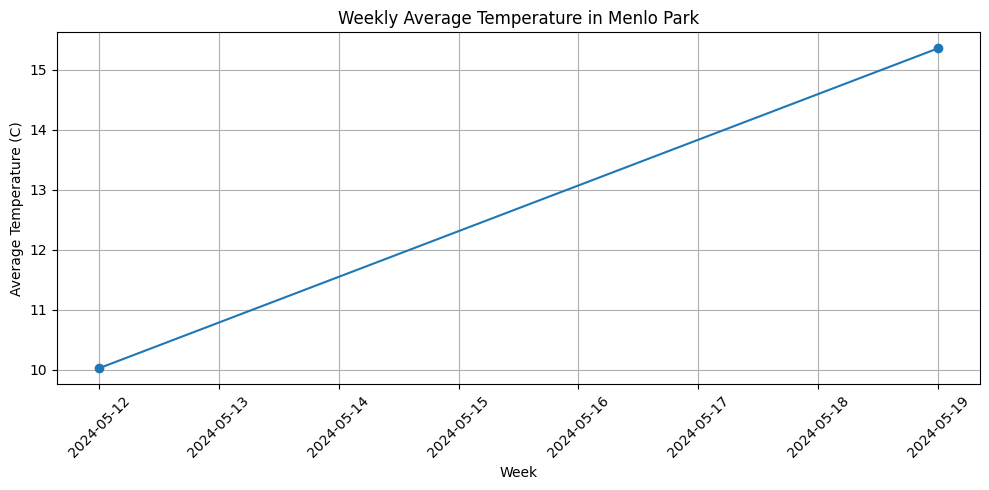

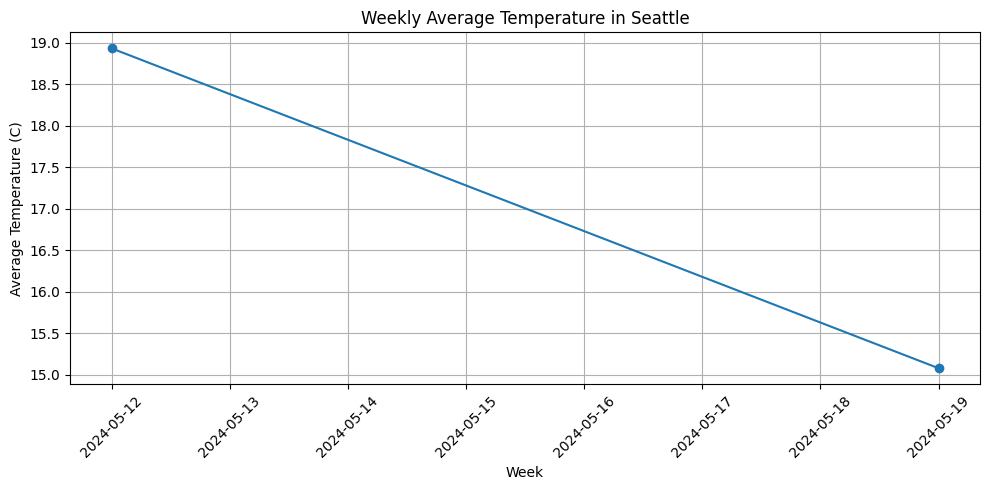

In [7]:
def plot_additional_graph(city, data):
    # Example additional graph: Average temperature over the week
    weekly_avg_temp = data['Temperature (C)'].resample('W').mean()
    plt.figure(figsize=(10, 5))
    plt.plot(weekly_avg_temp.index, weekly_avg_temp.values, marker='o', linestyle='-')
    plt.title(f"Weekly Average Temperature in {city}")
    plt.xlabel('Week')
    plt.ylabel('Average Temperature (C)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for city in cities:
    plot_additional_graph(city, processed_data[city])
